# Sentiment Analysis on Business(Customer Review)

In [312]:
#import all the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

### Load Data

In [313]:
import pandas as pd
df=pd.read_csv(r'C:\Users\HP\Downloads\movies\sentiment business\Customer.csv')
df


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

In [314]:
df=df[['reviews.text','reviews.rating']]
df

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
34655,This is not appreciably faster than any other ...,3.0
34656,Amazon should include this charger with the Ki...,1.0
34657,Love my Kindle Fire but I am really disappoint...,1.0
34658,I was surprised to find it did not come with a...,1.0


In [315]:
df = df.rename(columns={'reviews.text': 'reviews', 'reviews.rating': 'rating'})
df

,reviews,rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
34655,This is not appreciably faster than any other ...,3.0
34656,Amazon should include this charger with the Ki...,1.0
34657,Love my Kindle Fire but I am really disappoint...,1.0
34658,I was surprised to find it did not come with a...,1.0


In [316]:
# check the null values
df.isnull().sum()

reviews     1
rating     33
dtype: int64

We only have null values in condition. We will drop the records with null values as it only accounts for 0.5 % of total data.

In [317]:
# drop the null values
df.dropna(inplace=True, axis=0)

In [318]:

# Convert Score to sentiment label
def label_sentiment(score):
    if score >3:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['rating'].apply(label_sentiment)


In [319]:
# target column 
df[['rating', 'Sentiment']].sample(5)

,rating,Sentiment
9868,4.0,Positive
30989,5.0,Positive
33672,4.0,Positive
13823,5.0,Positive
33741,5.0,Positive


In [320]:
df['rating'] = df['rating'].astype(int)
df


,reviews,rating,Sentiment
0,This product so far has not disappointed. My c...,5,Positive
1,great for beginner or experienced person. Boug...,5,Positive
2,Inexpensive tablet for him to use and learn on...,5,Positive
3,I've had my Fire HD 8 two weeks now and I love...,4,Positive
4,I bought this for my grand daughter when she c...,5,Positive
...,...,...,...
34655,This is not appreciably faster than any other ...,3,Neutral
34656,Amazon should include this charger with the Ki...,1,Negative
34657,Love my Kindle Fire but I am really disappoint...,1,Negative
34658,I was surprised to find it did not come with a...,1,Negative


In [321]:
neutral_reviews = df[df['Sentiment'] == 'Neutral']

# Count the occurrences of each value in the DataFrame
value_counts = neutral_reviews['Sentiment'].value_counts()

print(value_counts)


Sentiment
Neutral    1499
Name: count, dtype: int64


In [322]:
positive_reviews = df[df['Sentiment'] == 'Positive']

# Count the occurrences of each value in the DataFrame
value_counts = positive_reviews['Sentiment'].value_counts()

print(value_counts)


Sentiment
Positive    32315
Name: count, dtype: int64


In [323]:
neg_reviews = df[df['Sentiment'] == 'Negative']

# Count the occurrences of each value in the DataFrame
value_counts = neg_reviews['Sentiment'].value_counts()

print(value_counts)


Sentiment
Negative    812
Name: count, dtype: int64


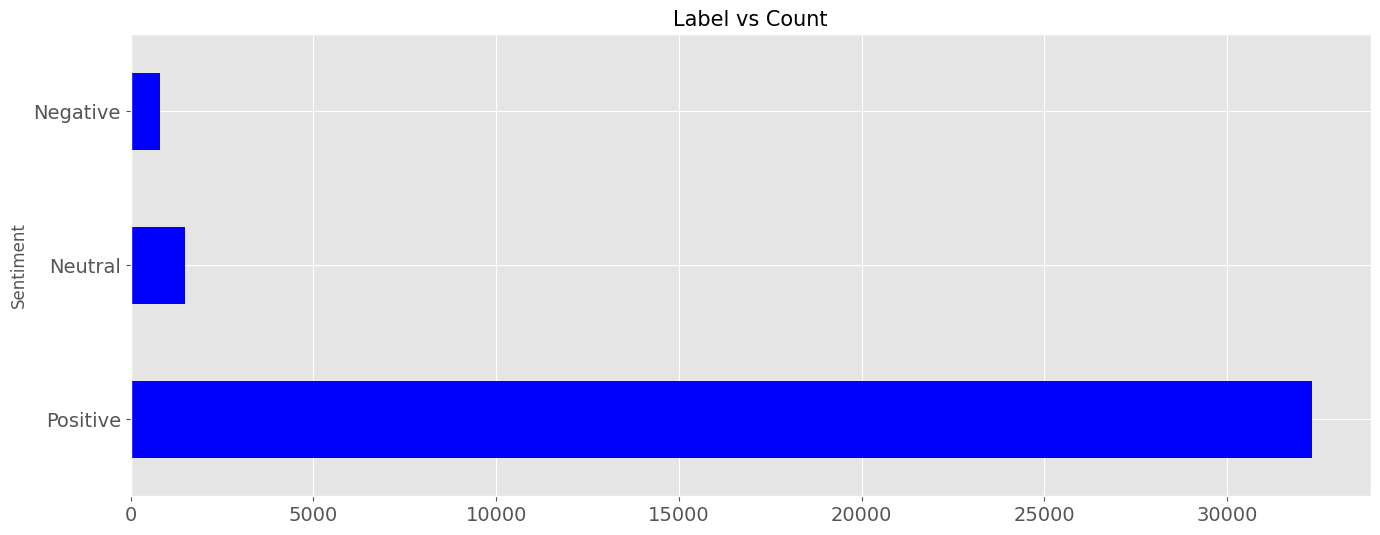

In [324]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = df.Sentiment.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [325]:
import pandas as pd
# Extract separate DataFrames for each sentiment category
neutral_data = df[df['Sentiment'] == 'Neutral']
positive_data = df[df['Sentiment'] == 'Positive']
negative_data = df[df['Sentiment'] == 'Negative']

# Find the minimum count among all sentiment categories
min_count = min(len(neutral_data), len(positive_data), len(negative_data))

# Downsample the positive sentiment data
positive_sampled = positive_data.sample(n=min_count, random_state=42)

# Upsample the neutral and negative sentiment data
neutral_sampled = neutral_data.sample(n=min_count, replace=True, random_state=42)
negative_sampled = negative_data.sample(n=min_count, replace=True, random_state=42)

# Concatenate the balanced data
balanced_data = pd.concat([positive_sampled, neutral_sampled, negative_sampled])

# Shuffle the balanced data
df= balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


# Now you have a balanced data containing equal counts of each sentiment category


In [326]:
df['Sentiment'].value_counts()

Sentiment
Negative    812
Neutral     812
Positive    812
Name: count, dtype: int64

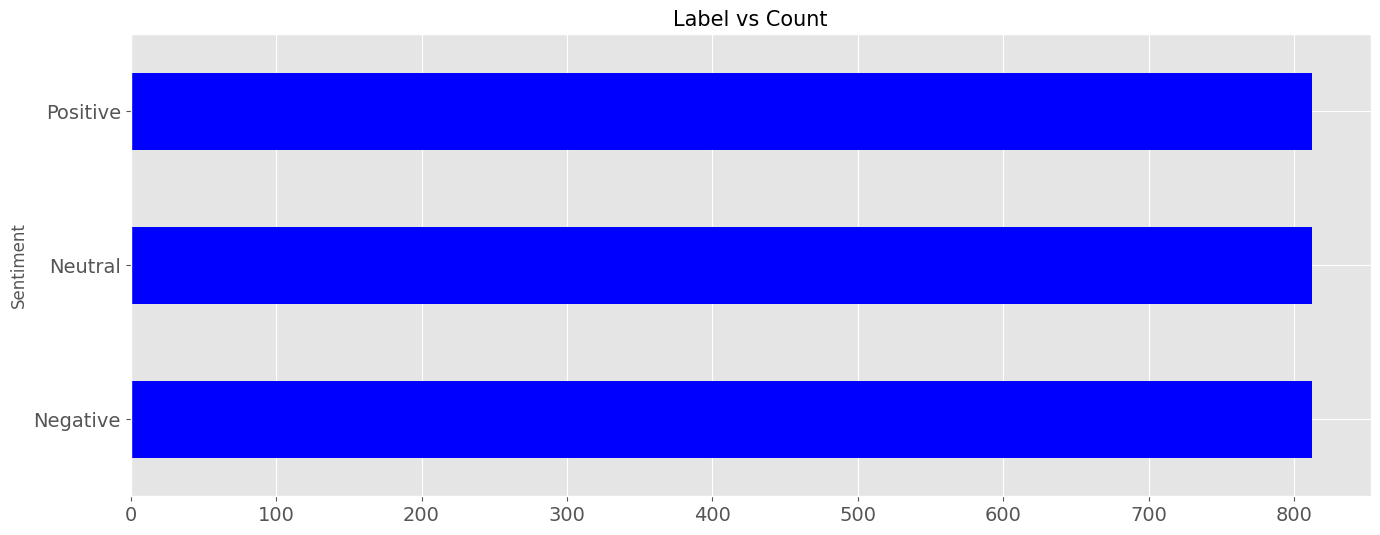

In [327]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = df.Sentiment.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

import pickle

In [329]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords 
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

# 
final_stopwords.add("one")
print(final_stopwords)

{'is', 'other', "that'll", 'were', 'do', 'our', 'he', 'or', 'from', 'have', 'weren', 'shan', 'against', 'to', 'between', 'd', 'should', 'who', 'of', 'has', 'shouldn', 'than', 'with', 'had', 'be', 'own', 'few', 'ours', 'them', 'can', 'those', 'yours', 'o', 'yourselves', "you'll", 'isn', 'what', 'will', 'about', 'through', 'then', 'these', 'there', 've', 's', 'mustn', 'for', 'their', 'him', 'when', 'theirs', 'which', 'too', 'didn', 'don', 'we', "you've", 'having', 'a', 'where', 'hadn', 'so', 'yourself', 'in', 'won', 'off', 'out', 'me', 'her', 'very', 'here', 'below', 'haven', 'needn', 'ourselves', 'your', 'how', 'they', 'over', 'at', 'hers', 'most', 'one', 'did', 'but', 'as', 'down', 'you', 'his', 'that', 'couldn', "it's", 'while', 'this', 't', 'because', 'i', 'whom', 'himself', 'only', "she's", 'some', 'themselves', 'was', 'such', 'same', 'all', 'hasn', 'more', "you'd", 'again', 'ain', 'are', 'doesn', 'any', 'if', 'myself', 'just', 'wasn', 'why', 'been', 'further', 'into', 'ma', 're', '

In [330]:
#stemming object
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")
# ---------------------------------------------

In [331]:
def preprocessor(reviews):
    # remove html tags
    reviews = HTMLTAGS.sub(r'', reviews)

    # remove puncutuation
    reviews = reviews.translate(table)
    
    # remove digits
    reviews = reviews.translate(remove_digits)
    
    # lower case all letters
    reviews = reviews.lower()
    
    # replace multiple white spaces with single space
    reviews = MULTIPLE_WHITESPACE.sub(" ", reviews).strip()
    
    # remove stop words
    reviews = [word for word in reviews.split()
              if word not in final_stopwords]
    
    # stemming
    reviews = ' '.join([stemmer.stem(word) for word in reviews])
    
    return reviews

In [332]:
print("Before preprocessing : ")
df.reviews.iloc[6]

Before preprocessing : 


'Got this for my mom. Decent tablet not heavy and good pirce. She loves it.'

In [333]:
# apply preprocessing function

df.reviews = df.reviews.apply(preprocessor) 
print("After preprocessing : ")
df.reviews.iloc[6]

After preprocessing : 


'got mom decent tablet not heavi good pirc love'

In [334]:
def generate_wcloud(reviews):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(reviews)
    
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

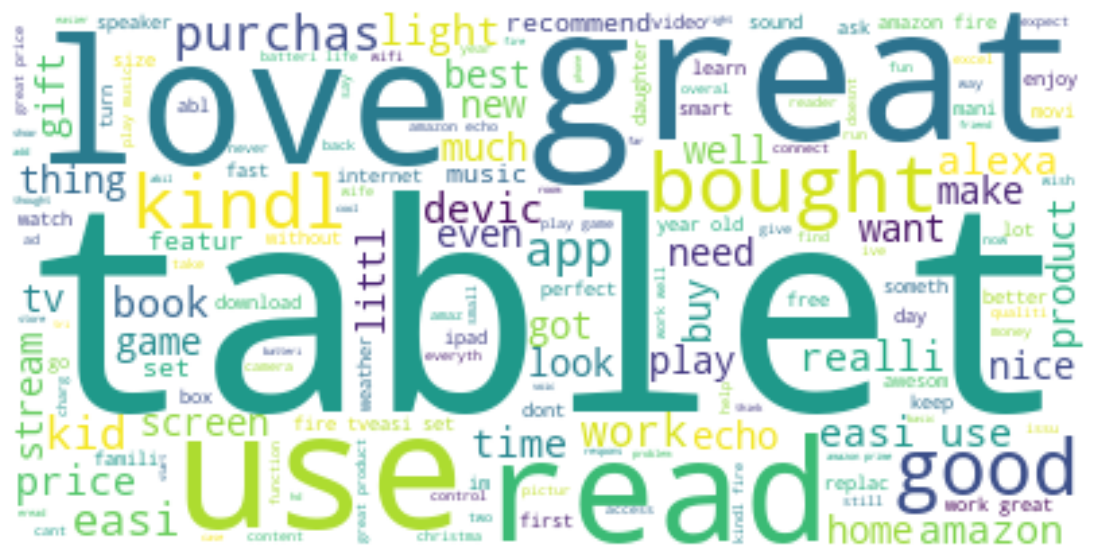

In [335]:
pos = df.loc[df.Sentiment=="Positive"].reviews
text = " ".join(reviews for reviews in pos.astype(str))

generate_wcloud(text)

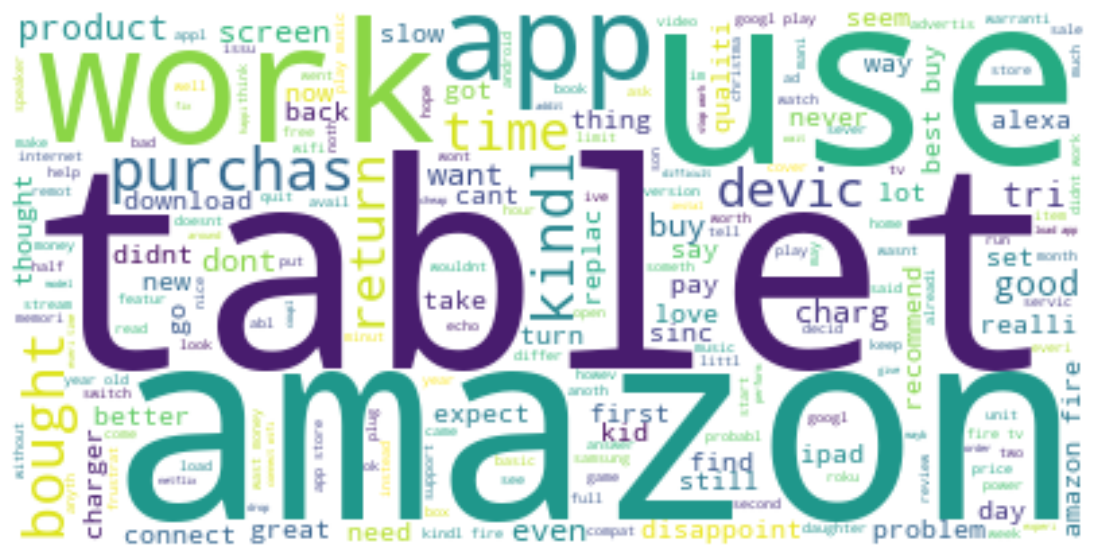

In [336]:
pos = df.loc[df.Sentiment=="Negative"].reviews
text = " ".join(reviews for reviews in pos.astype(str))

generate_wcloud(text)

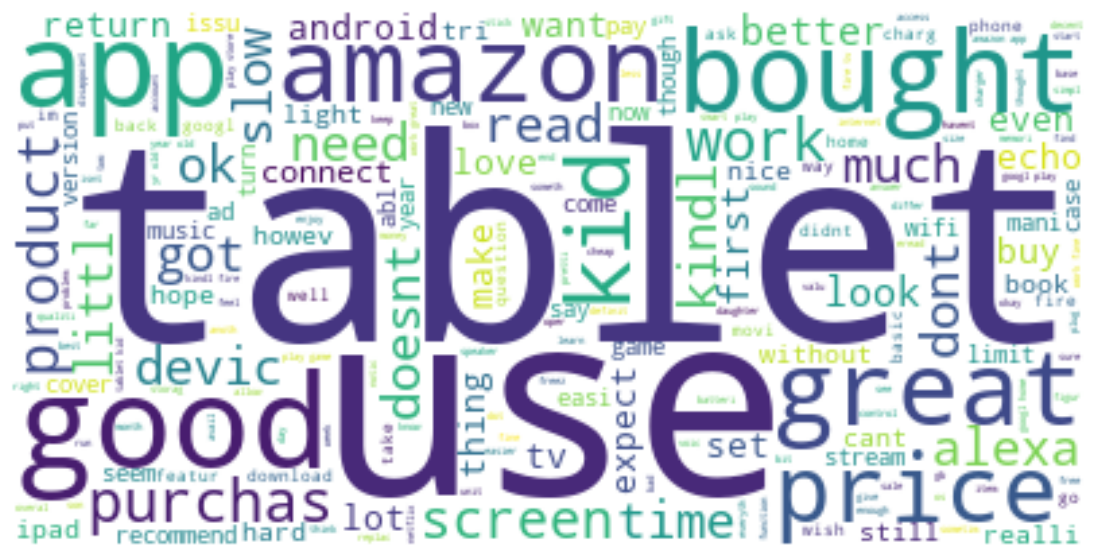

In [337]:
pos = df.loc[df.Sentiment=="Neutral"].reviews
text = " ".join(reviews for reviews in pos.astype(str))

generate_wcloud(text)

### Steps for reviews pre-processing.
* **Remove HTML tags**
     * Using BeautifulSoup from bs4 module to remove the html tags. We have already removed the html tags with pattern "64</_span_>...", we will use get_text() to remove the html tags if there are any.
* **Remove Stop Words**
     * Remove the stopwords like "a", "the", "I" etc.
* **Remove symbols and special characters**
     * We will remove the special characters from our reviews like '#' ,'&' ,'@' etc.
* **Tokenize**
     * We will tokenize the words. We will split the sentences with spaces e.g "I might come" --> "I", "might", "come"
* **Stemming**
     * Remove the suffixes from the words to get the root form of the word e.g 'Wording' --> "Word"

## Building Model

In [338]:
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

 we cannot pass raw text features in our model. We have to convert them into numeric values. We will use TfidfVectorizer to convert our reviews in numeric features.

### TfidfVectorizer (Term frequency - Inverse document frequency)
**TF - Term Frequency** :- 

How often a term t occurs in a document d.

TF = (_Number of occurences of a word in document_) / (_Number of words in that document_)

**Inverse  Document Frequency**

IDF = log(Number of sentences / Number of sentence containing word)

**Tf - Idf = Tf * Idf**


In [339]:
X = df.reviews
y = df.Sentiment

X_train, X_test, y_train, y_test = train_test_split(
    
    X, y, test_size=0.20, random_state=1, stratify=y)

In [340]:
X_train.shape, X_test.shape

((1948,), (488,))

In [341]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

# transform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

In [342]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

# transform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

In [343]:
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels) # index-> class

['Negative', 'Neutral', 'Positive']


In [344]:
### 
from sklearn.metrics import accuracy_score, confusion_matrix
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

In [345]:
# Hyperparameters
from sklearn.linear_model import LogisticRegression
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.6242299794661191
Test accuracy score : 0.6290983606557377

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.7505133470225873
Test accuracy score : 0.6782786885245902

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.8747433264887063
Test accuracy score : 0.7192622950819673

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.9774127310061602
Test accuracy score : 0.7397540983606558

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.9989733059548255
Test accuracy score : 0.7131147540983607

 ----------------------------------------


In [346]:
from sklearn.naive_bayes import MultinomialNB
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.8896303901437371
Test accuracy score : 0.6331967213114754

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.8675564681724846
Test accuracy score : 0.6782786885245902

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.8495893223819302
Test accuracy score : 0.6823770491803278

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.8429158110882957
Test accuracy score : 0.6823770491803278

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.837782340862423
Test accuracy score : 0.6864754098360656

 ----------------------------------------


In [347]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.7135523613963038
Test accuracy score : 0.6577868852459017

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.752053388090349
Test accuracy score : 0.6721311475409836

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.7920944558521561
Test accuracy score : 0.694672131147541

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.898870636550308
Test accuracy score : 0.7254098360655737

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.9912731006160165
Test accuracy score : 0.7295081967213115

 ----------------------------------------


In [348]:
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.9322381930184805
Test accuracy score : 0.6434426229508197

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.9127310061601642
Test accuracy score : 0.6885245901639344

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.8865503080082136
Test accuracy score : 0.6885245901639344

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.8803901437371663
Test accuracy score : 0.6885245901639344

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.8752566735112937
Test accuracy score : 0.6926229508196722

 ----------------------------------------


In [349]:

def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)
    
    return plt.show()

In [350]:
bmodel = MultinomialNB(alpha=a)
bmodel.fit(bow_X_train, y_train)

MultinomialNB(alpha=1)

In [351]:
# predictions
y_preds_train = bmodel.predict(bow_X_train)
y_preds_test = bmodel.predict(bow_X_test)

In [352]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.837782340862423
Test accuracy score : 0.6864754098360656


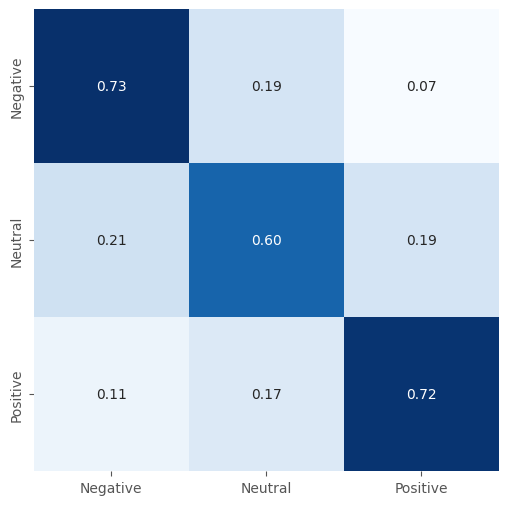

In [353]:
plot_cm(y_test, y_preds_test)

In [354]:
import pickle
with open("transformer1.pkl", "wb") as f:
    pickle.dump(bow_vectorizer, f)
    
with open("model1.pkl", "wb") as f:
    pickle.dump(bmodel, f)

In [355]:
# labels = ['Negative', 'Neutral', 'Positive']
def get_sentiment(review):
    # preprocessing
    x = preprocessor(review)
    #vectorization
    x = bow_vectorizer.transform([x])
    #prediction
    y = int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [356]:
# positve review
review = "Absolutely love this product! It exceeded my expectations and has made my life so much easier."
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


In [357]:
review = "Not worth the money. Poor quality and didn't work as advertised."
print(f"This is a {get_sentiment(review)} review!")

This is a Negative review!


In [358]:
review ="Average experience overall. The product worked fine, but nothing remarkable."
print(f"This is a {get_sentiment(review)} review!")

This is a Neutral review!
